In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing



In [3]:
#load the contents of a file into a pandas Dataframe

input_file = './titanic/train.csv'
df_titanic = pd.read_csv(input_file)

## Data Preprocessing

In [4]:
#Get information of the no. of rows and columns
df_titanic.shape

(891, 12)

The dataframe has 891 rows and 12 columns

In [5]:
#titles of the 12 columns
print (df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Let us check if there are missing values in the columns
You can either use .info() or isnull().sum()

In [6]:
#How many missing values?
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on the above data, there are 177 missing values in age, cabin 687, and embarked 2 are missing. 

In [7]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Does this dataframe have a named index? if so, what is it?
print (df_titanic.index.name)

None


The dataframe has no index and then I will make the PassengerId as an attribute of the dataframe. 

In [9]:
df_titanic.set_index("PassengerId", inplace=True)

In [10]:
# Does this dataframe have a named index? if so, what is it?
print (df_titanic.index.name)

PassengerId


As we have made the PassengerId as an index, let us check the remaining columns and their titles

In [11]:
df_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# how many rows and columns in the dataframe
# after the index has been set?
df_titanic.shape

(891, 11)

the number of columns has changed to 11 now. 

#### Extracting the target variable from the dataset and placing it into another dataset
When training the dataset, one needs to seperate target variable as one of the input features. 
We are going to do the same on this dataset and place it into a seperate dataframe with the other feature variables


In [13]:
# extract the target attribute into its own dataframe
df_titanic_target = df_titanic.loc[:,['Survived']]

# create a dataframe that contains the 10 feature variables
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

The Survived attribute is a binary attribute in which a value of 1 implies that the individual survived

In [14]:
# what is the split between the two classes of the target variable?
df_titanic_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

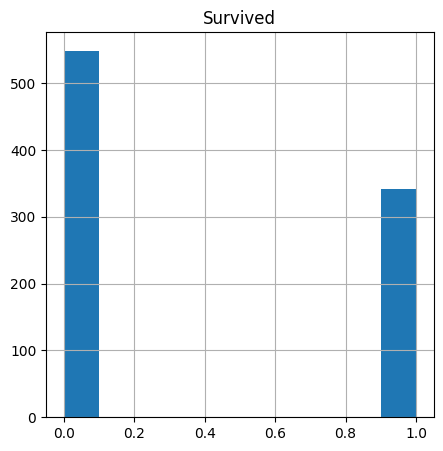

In [15]:
# visual presentation of those who survived or not 
# histogram of target variable 
df_titanic_target.hist(figsize=(5,5))


Above is the visual representation of the people who survived and those who died in the Titanic. 
Based on the histogram, majority of the people died (Survived=No=0) compared to those who survived. 

In [16]:
# unique values and counts of categorical attribute 'Embarked'
# Include NaN markers 
df_titanic_features['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

The above code uses value_counts to include also NaN values. Basically, tthe function does not pick NaN values which we have to program it to by using dropna=False

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

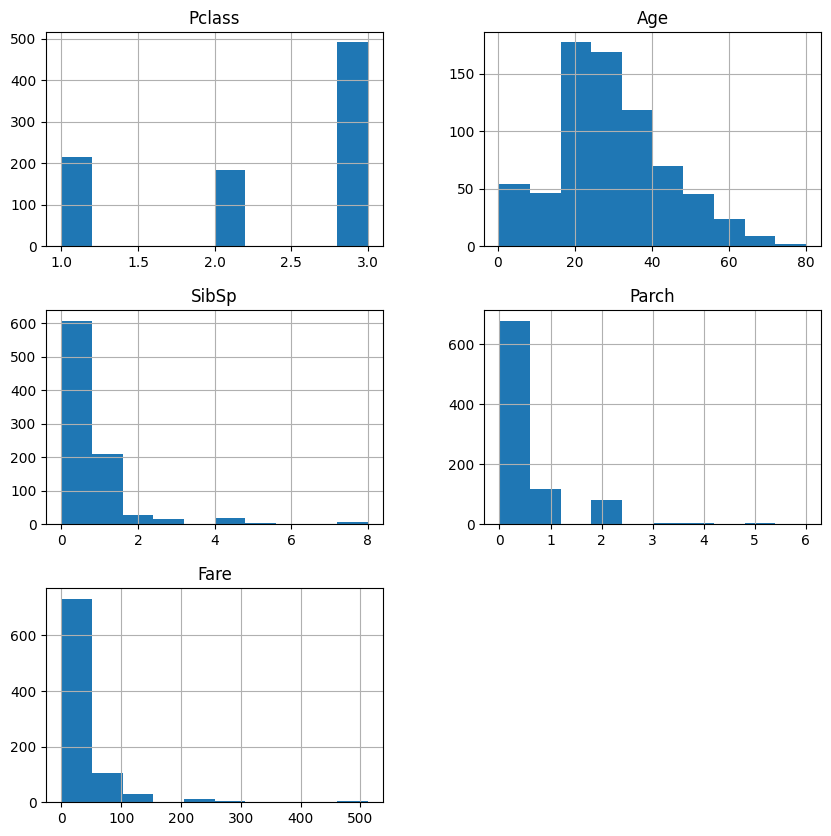

In [17]:
#histogram of features
df_titanic_features.hist(figsize=(10,10))

Analysis of the above histograms:
Majority of the passengers had 3rd class tickets, then first class and few had 2nd class tickets. 
Also, the rough estimate of the travellers were between the age of 19 and 25, followed by passengers between the age of 26 and 30. A very small percent of the travellers were above the age of 70. 
Most of the passengers in the Titanic were travelling with their spouses and siblings. Most of them were also travelling with their parents. 
Note: only numerical features can be used to create histograms. 

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

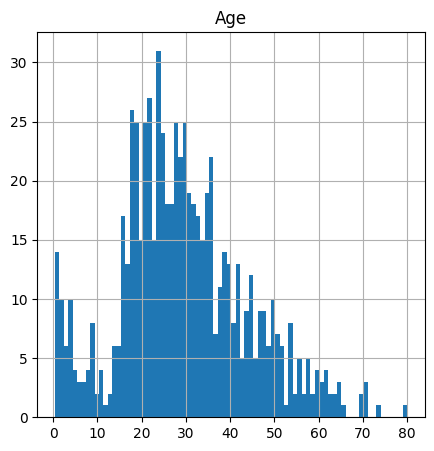

In [18]:
#histogram of single feature - Age
# it is a good idea to try different bin widths to get a better idea of
# the distribution of values
df_titanic_features.hist(column='Age',figsize=(5,5), bins=80)

On close analysis of the age using a bin of 80, the majority of the passengers were between 24 and 25 years of age. 

<Axes: xlabel='Embarked'>

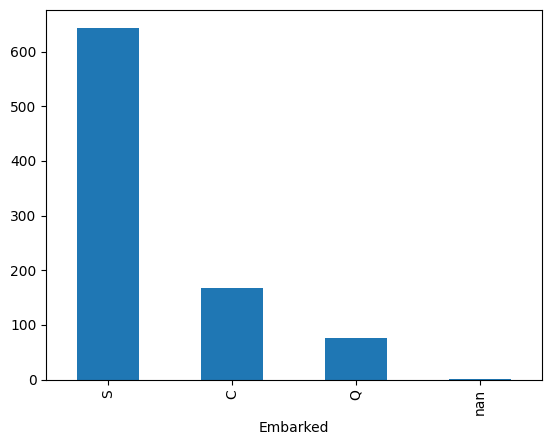

In [19]:
# histogram of categorical attribute 'Embarked'
# Computed from the output of the value_counts() function 
vc = df_titanic_features['Embarked'].value_counts(dropna=False)
vc.plot(kind='bar')

Analysis of where most of the passengers were to embark at:
Southampton was the preferred destination of majority of the passengers. 
Then followed by C = Cherbourg, and then Q = Queenstown
Note: The data has NaN values which have to be looked into 

In [20]:
#get statistical analysis of the data 
df_titanic_features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering

In [21]:
# fill in missing values with the median 
median_age = df_titanic_features['Age'].median()
print(median_age)

28.0


In [22]:
df_titanic_features["Age"].fillna(median_age, inplace=True)

/tmp/ipykernel_24823/831867266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_features["Age"].fillna(median_age, inplace=True)


In [23]:
#fill the missing values of the Embarked attribute
# with the most common value in the column

embarked_value_counts = df_titanic_features['Embarked'].value_counts(dropna=True)
most_common_value = embarked_value_counts.index[0]
print (most_common_value)


df_titanic_features["Embarked"].fillna(most_common_value, inplace=True)

S


/tmp/ipykernel_24823/2272218285.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_features["Embarked"].fillna(most_common_value, inplace=True)


The most common value is S and it has filled in the two missing values. 

In [24]:
# create a boolean feature 'CabinIsKnown'
# which will have True if the Cabin column
# does not have missing data
df_titanic_features['CabinIsKnown'] = ~df_titanic_features.Cabin.isnull()

# drop the Cabin column from the dataframe
df_titanic_features.drop(['Cabin'], axis=1, inplace=True)

The above code creates a new variable (CabinIsKnown). The missing values in the Cabin column is a lot (687) and filing it with the mode will create a bias. The new column has been created and Cabin column has been dropped. 

In [25]:
#display the columns of the dataframe 
print(df_titanic_features.columns.values)

#display number of missing values in the column 
df_titanic_features.isnull().sum()

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Embarked'
 'CabinIsKnown']


Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinIsKnown    0
dtype: int64

###### Creating new features

In [26]:
# create a numeric feature called FamilySize that is
# the sum of the SibSp and Parch features

df_titanic_features['FamilySize'] = df_titanic_features.SibSp + df_titanic_features.Parch

When looking at the variables presented, SibSp looked at the number of siblings/spouses travelling together. 
- Parch represents number of parents and children travelling together 
- the information are almost the same hence, I have combined the two by adding them together. 

In [27]:
# generate new categorical feature AgeCategory
bins_age = [0,20,30,40,50,150]
labels_age = ['<20','20-30','30-40','40-50','>50']

df_titanic_features['AgeCategory'] = pd.cut(df_titanic_features.Age,
bins=bins_age,
labels=labels_age,
include_lowest=True)

#### new features
- creating bins makes it easier during model building 

In [28]:
#examine the new columns 
df_titanic_features.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,False,0,20-30
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True,0,>50
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,False,4,<20
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False,2,20-30


In [29]:
# generate new categorical feature FareCategory
df_titanic_features['FareCategory'] = pd.qcut(df_titanic_features.Fare,
q=4,
labels=['Q1', 'Q2', 'Q3', 'Q4'])

#### Transforming Numeric Features

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'NormalizedAge'}>],
       [<Axes: title={'center': 'StandardizedAge'}>, <Axes: >]],
      dtype=object)

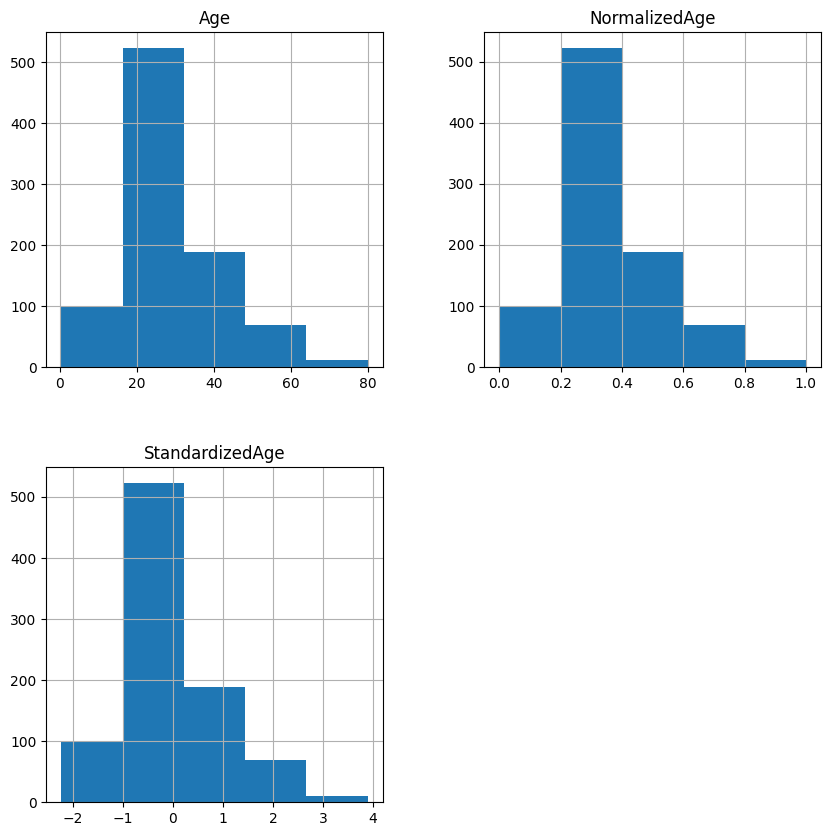

In [30]:
# generate new feature NormalizedAge using MinMaxScaler

minmax_scaler = preprocessing.MinMaxScaler()
ndNormalizedAge = minmax_scaler.fit_transform(df_titanic_features[['Age']].values)
df_titanic_features['NormalizedAge'] = pd.DataFrame(ndNormalizedAge)

# generate new feature StandardizedAge using StandardScaler
standard_scaler = preprocessing.StandardScaler()
ndStandardizedAge = standard_scaler.fit_transform(df_titanic_features[['Age']].values)
df_titanic_features['StandardizedAge'] = pd.DataFrame(ndStandardizedAge)
# histogram of Age, NormalizedAge, StandardizedAge
df_titanic_features[['Age', 'NormalizedAge', 'StandardizedAge']].hist(figsize=(10,10), bins=5)

### One-hot Encoding

The above code looks at one-hot encoding and uses get_dummies() function to do so. 
- It converts categorical data into numerical variables
- The variables that have been converted include; Sex, Embarked, CabinIsKnown, AgeCategory, and FareCategory

In [31]:
# use one-hot encoding to convert categorical attributes
# into binary numeric attributes
df_titanic_features = pd.get_dummies(df_titanic_features, columns=['Sex','Embarked','CabinIsKnown','AgeCategory','FareCategory'])

# display the columns of the dataframe.
print (df_titanic_features.columns.values)

['Pclass' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'FamilySize'
 'NormalizedAge' 'StandardizedAge' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S' 'CabinIsKnown_False' 'CabinIsKnown_True'
 'AgeCategory_<20' 'AgeCategory_20-30' 'AgeCategory_30-40'
 'AgeCategory_40-50' 'AgeCategory_>50' 'FareCategory_Q1' 'FareCategory_Q2'
 'FareCategory_Q3' 'FareCategory_Q4']


In [32]:
df_titanic_features[['Sex_male', 'Sex_female']].head()

,Sex_male,Sex_female
PassengerId,,
1,True,False
2,False,True
3,False,True
4,False,True
5,True,False


In [33]:
#How many missing values?
df_titanic_features.isnull().sum()

Pclass                0
Name                  0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
FamilySize            0
NormalizedAge         1
StandardizedAge       1
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
CabinIsKnown_False    0
CabinIsKnown_True     0
AgeCategory_<20       0
AgeCategory_20-30     0
AgeCategory_30-40     0
AgeCategory_40-50     0
AgeCategory_>50       0
FareCategory_Q1       0
FareCategory_Q2       0
FareCategory_Q3       0
FareCategory_Q4       0
dtype: int64

In [34]:
# strong negative correlation between Sex_male and Sex_female.
# one of these can be dropped.
corr_matrix = df_titanic_features[['Sex_male', 'Sex_female']].corr()
print(corr_matrix)

            Sex_male  Sex_female
Sex_male         1.0        -1.0
Sex_female      -1.0         1.0


In [35]:
# drop the Name, Ticket, Sex_female, CabinIsKnown_False features
# to get a dataframe that can be used for linear or logistic regression
df_titanic_features_numeric = df_titanic_features.drop(['Name', 'Ticket',
'Sex_female', 'CabinIsKnown_False'], axis=1)

In [36]:
df_titanic_features.head(10)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,NormalizedAge,StandardizedAge,...,CabinIsKnown_True,AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0.472229,0.663861,...,False,False,True,False,False,False,True,False,False,False
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0.321438,-0.258337,...,True,False,False,True,False,False,False,False,False,True
3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0.434531,0.433312,...,False,False,True,False,False,False,False,True,False,False
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0.434531,0.433312,...,True,False,False,True,False,False,False,False,False,True
5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0.346569,-0.104637,...,False,False,False,True,False,False,False,True,False,False
6,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,0,0.673285,1.893459,...,False,False,True,False,False,False,False,True,False,False
7,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,0.019854,-2.102733,...,True,False,False,False,False,True,False,False,False,True
8,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,4,0.334004,-0.181487,...,False,True,False,False,False,False,False,False,True,False
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,2,0.170646,-1.180535,...,False,False,True,False,False,False,False,True,False,False


## Data Visualization

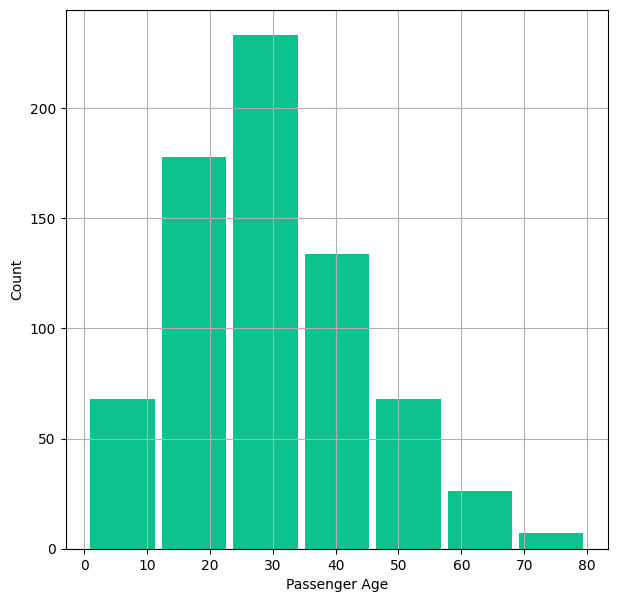

In [37]:
# Use pyplot functions to plot a histogram of the 'Age' attribute
fig = plt.figure(figsize=(7,7))
plt.xlabel('Passenger Age')
plt.ylabel('Count')
plt.grid()
n, bins, patches = plt.hist(df_titanic['Age'], histtype='bar', color='#0dc28d', align='mid', rwidth=0.90, bins=7)

([<matplotlib.axis.XTick at 0x763679279120>,
 [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q'), Text(3, 0, 'nan')])

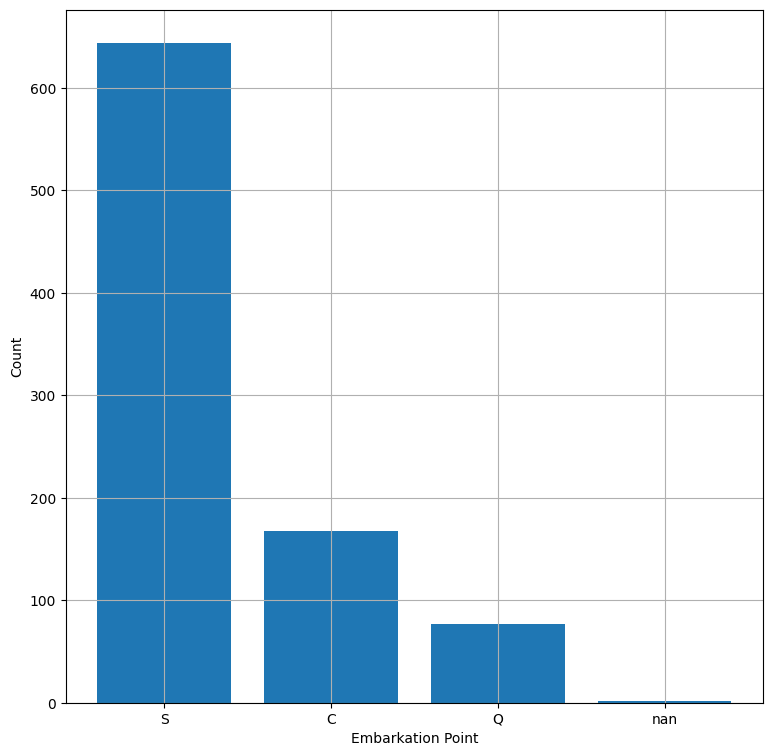

In [38]:
# use pyplot functions to plot a bar chart of the 'Embarked' attribute
fig = plt.figure(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.grid()

values = df_titanic['Embarked'].unique()
counts = df_titanic['Embarked'].value_counts(dropna=False)
x_positions = np.arange(len(values))

plt.bar(x_positions, counts, align='center')
plt.xticks(x_positions, values)

Most passengers boarded the ship at Southampton 

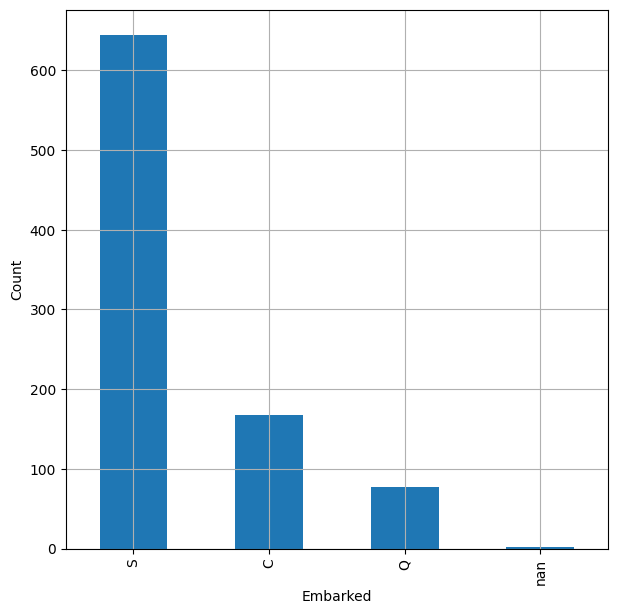

In [41]:
#Plotting alternatively using Pandas functons
#Use Pandas dataframe functions to plot a bar chart of the 'Embarked' attribute
fig = plt.figure(figsize=(7,7))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.grid()


df_titanic['Embarked'].value_counts(dropna=False).plot.bar(grid=True).color='#0dc28d'